In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\chand\AppData\Local\Temp/ipykernel_10876/2247087184.py:15: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(class_1_data[:,0],class_1_data[:,1],marker='+',c='blue',edgecolors='black')


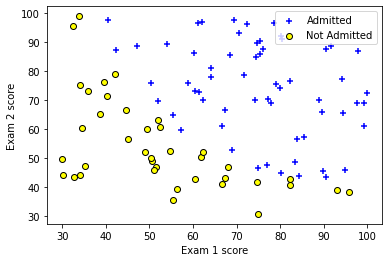

In [113]:
data = pd.read_csv('ex2data1.txt').to_numpy()
x = data[:,:-1]
y = data[:,-1].reshape(-1)

pos_x = []
neg_x = []
for i in data:
    if i[2]==1:
        pos_x.append(i[:-1])
    else:
        neg_x.append(i[:-1])
class_1_data = np.array(pos_x)
class_2_data = np.array(neg_x)
del pos_x,neg_x
plt.scatter(class_1_data[:,0],class_1_data[:,1],marker='+',c='blue',edgecolors='black')
plt.scatter(class_2_data[:,0],class_2_data[:,1],marker='o',c='yellow',edgecolors='black')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted','Not Admitted'],loc=1)


In [307]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))
def cost(y_val, theta_val, x_val):
    return np.sum((-y_val * np.log(sigmoid(theta_val.T @ x_val)) \
        - (1-y_val) * np.log(1-sigmoid(sigmoid(theta_val.T @ x_val)))))/(y_val.shape[0])
def grad_cost(y_val, theta_val, x_val):
    err = sigmoid(theta_val.T @ x_val)-y_val
    count = y_val.shape[0]
    return (x_val @ err.T)/count
def predict(theta_val,exam1,exam2):
    res = theta_val.T @ np.array([[1,exam1,exam2]]).T  
    return sigmoid(res).item()


In [286]:

loop = 1000
#theta = np.array([[1,1,1]]).T
theta = np.array([[-24.87,0.20,0.20]]).T
gradient = np.array([[1e-3,1e-3,1e-3]]).T
x_a = np.c_[[1]*99,x].T
sig = np.mean(x)
x_range = np.max(x,axis=0)-np.min(x,axis=0)
x_a_mn = np.c_[[1]*99,(x-sig)/x_range].T
grad_cost(y,theta,x_a)
cost(y,theta,x_a)
cost_list =[]
for _ in range(loop):
    theta = theta - (gradient * grad_cost(y,theta,x_a))
    cost_list.append(cost(y,theta,x_a))


C:\Users\chand\AppData\Local\Temp/ipykernel_10876/2284256746.py:3: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(class_1_data[:,0],class_1_data[:,1],marker='+',c='blue',edgecolors='black')


(30.60326323428011, 100.0)

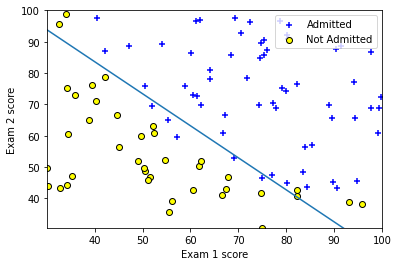

In [246]:
a = np.linspace(0,100,100)
b = -(theta[0]+theta[1]*a)/theta[2]
plt.scatter(class_1_data[:,0],class_1_data[:,1],marker='+',c='blue',edgecolors='black')
plt.scatter(class_2_data[:,0],class_2_data[:,1],marker='o',c='yellow',edgecolors='black')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted','Not Admitted'],loc=1)
plt.plot(a,b)
plt.xlim([np.min(x[:,0]),100])
plt.ylim([np.min(x[:,1]),100])


In [308]:
predict(theta,45,85)

0.7811197130026437